In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import korean

In [ ]:
# <과제 1>
# 서울시 인구 분포와 서울시 CCTV 설치 현황(갯수)데이터를 가지고 데이터 분석 및 시각화하셔요.
# - 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율을 구해 순위 비교
# - 인구대비 cctv의 평균치를 확인하고 cctv가 과하게 부족한 구를 확인
# - 고령자 대비 cctv 비율
# - 외국인 대비 cctv 비율

# <과제 2>
# 지방자치단체에서 인/허가한 업종별 데이터를 가지고 데이터 분석 및 시각화하셔요
# - 서울시 서대문구에서 치킨집이 가장 많은 동은?
# - 서울시 구별 치킨집 현황(갯수) 등

In [2]:
cctv_result_data = pd.read_csv('./data/cctv_result.csv')
cctv_result_data

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321
5,광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917
6,구로구,1884,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.420654
7,금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458
8,노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.275034
9,도봉구,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630


In [3]:
# --- cctv 수 컬럼 추가 ---

cctv_result_data['CCTV수'] = (cctv_result_data['CCTV비율'] / 100) * cctv_result_data['인구수']
cctv_result_data

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,3238.0
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,1010.0
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,831.0
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,911.0
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,2109.0
5,광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,878.0
6,구로구,1884,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.420654,1884.0
7,금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458,1348.0
8,노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.275034,1566.0
9,도봉구,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630,825.0


In [4]:
# --- 인구대비 CCTV 비율(1000명당) 컬럼 추가 ---

cctv_result_data['인구대비 CCTV비율'] = cctv_result_data['CCTV비율'] * 10
cctv_result_data

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수,인구대비 CCTV비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,3238.0,5.675723
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,1010.0,2.228434
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,831.0,2.516718
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,911.0,1.508848
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,2109.0,4.013206
5,광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,878.0,2.359175
6,구로구,1884,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.420654,1884.0,4.206540
7,금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458,1348.0,5.284575
8,노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.275034,1566.0,2.750341
9,도봉구,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630,825.0,2.366297


In [30]:
# --- 인구대비 CCTV 비율 높은 순위 ---

cctv_index_data = cctv_result_data.sort_values(by="인구대비 CCTV비율", ascending=False)
# '인구대비 CCTV비율'을 기준으로 내림차순 정렬
# sort_values()는 기본적으로 원본 DataFrame을 변경하지 않고
# 정렬된 새로운 DataFrame을 반환하므로, 
# 결과를 cctv_index_data라는 새로운 변수에 저장

cctv_index_data.index = range(1, len(cctv_index_data) + 1)
# 정렬 후 인덱스를 1부터 다시 부여
# range의 끝은 포함되지 않기 때문에 +1을 해주어 전체 행 수를 반영함

cctv_index_data

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수,인구대비 CCTV비율
1,종로구,1619,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,0.994350,1619.0,9.943496
2,용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,2096.0,8.583023
3,중구,1023,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,0.767787,1023.0,7.677875
4,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,3238.0,5.675723
5,금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458,1348.0,5.284575
6,양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,2482.0,5.171070
7,서초구,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.510093,2297.0,5.100930
8,동대문구,1870,74.766355,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322,0.506095,1870.0,5.060948
9,은평구,2108,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.426386,2108.0,4.263858
10,성동구,1327,81.780822,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,0.426354,1327.0,4.263536


In [6]:
# --- 하위 행 확인 ---
cctv_index_data.tail(1)

# 강서구가 제일 낮음을 확인

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수,인구대비 CCTV비율
25,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.08054,12.015794,0.150885,911.0,1.508848


In [7]:
# --- 상위 행 확인 ---
cctv_index_data.head(1)

# 종로구가 제일 높음을 확인

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수,인구대비 CCTV비율
1,종로구,1619,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,0.99435,1619.0,9.943496


In [8]:
# --- 고령자 대비 cctv 비율 ---

elderly_people_data = cctv_result_data[['구별', '고령자', '고령자비율', 'CCTV수', 'CCTV비율']]
# 새로운 DataFrame을 생성

elderly_people_data['고령자 대비 CCTV비율'] = (elderly_people_data['CCTV수'] / elderly_people_data['고령자']) * 1000
# 고령자 대비 cctv 비율 컬럼 추가

elderly_people_data.sort_values(by="고령자 대비 CCTV비율", ascending=False, inplace=True)
# '고령자 대비 CCTV비율'을 기준으로 내림차순 정렬
# 기본적으로 sort_values()는 새로운 DataFrame을 반환하기 때문에
# inplace=True를 사용하면 elderly_people_data 자체가 정렬된 상태로 변경됨

elderly_people_data.index = range(1, len(elderly_people_data) + 1)
# 정렬 후 인덱스를 1부터 다시 부여
# range의 끝은 포함되지 않기 때문에 +1을 해주어 전체 행 수를 반영함

elderly_people_data

C:\Users\USER\AppData\Local\Temp\ipykernel_13600\52101615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elderly_people_data['고령자 대비 CCTV비율'] = (elderly_people_data['CCTV수'] / elderly_people_data['고령자']) * 1000
C:\Users\USER\AppData\Local\Temp\ipykernel_13600\52101615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elderly_people_data.sort_values(by="고령자 대비 CCTV비율", ascending=False, inplace=True)


,구별,고령자,고령자비율,CCTV수,CCTV비율,고령자 대비 CCTV비율
1,종로구,25425.0,15.615404,1619.0,0.994350,63.677483
2,용산구,36231.0,14.836427,2096.0,0.858302,57.851012
3,강남구,63167.0,11.072217,3238.0,0.567572,51.260943
4,중구,20764.0,15.583909,1023.0,0.767787,49.267964
5,양천구,52975.0,11.036964,2482.0,0.517107,46.852289
6,서초구,51733.0,11.488308,2297.0,0.510093,44.401059
7,금천구,32970.0,12.925255,1348.0,0.528458,40.885654
8,동대문구,54173.0,14.661322,1870.0,0.506095,34.519041
9,성동구,39997.0,12.850689,1327.0,0.426354,33.177488
10,구로구,56833.0,12.689506,1884.0,0.420654,33.149755


In [9]:
# --- 외국인 대비 cctv 비율 ---

foreigner_data = cctv_result_data[['구별', '외국인', '외국인비율', 'CCTV수', 'CCTV비율']]
# 새로운 DataFrame을 생성

foreigner_data['외국인 대비 CCTV비율'] = (foreigner_data['CCTV수'] / foreigner_data['외국인']) * 1000
# 외국인 대비 cctv 비율 컬럼 추가

foreigner_data.sort_values(by="외국인 대비 CCTV비율", ascending=False, inplace=True)
# '외국인 대비 CCTV비율'을 기준으로 내림차순 정렬
# 기본적으로 sort_values()는 새로운 DataFrame을 반환하기 때문에
# inplace=True를 사용하면 elderly_people_data 자체가 정렬된 상태로 변경됨

foreigner_data.index = range(1, len(foreigner_data) + 1)
# 정렬 후 인덱스를 1부터 다시 부여
# range의 끝은 포함되지 않기 때문에 +1을 해주어 전체 행 수를 반영함

foreigner_data

C:\Users\USER\AppData\Local\Temp\ipykernel_13600\513552374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreigner_data['외국인 대비 CCTV비율'] = (foreigner_data['CCTV수'] / foreigner_data['외국인']) * 1000
C:\Users\USER\AppData\Local\Temp\ipykernel_13600\513552374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreigner_data.sort_values(by="외국인 대비 CCTV비율", ascending=False, inplace=True)


,구별,외국인,외국인비율,CCTV수,CCTV비율,외국인 대비 CCTV비율
1,강남구,4950.0,0.867660,3238.0,0.567572,654.141414
2,양천구,4029.0,0.839413,2482.0,0.517107,616.033755
3,서초구,4316.0,0.958451,2297.0,0.510093,532.205746
4,은평구,4445.0,0.899091,2108.0,0.426386,474.240720
5,노원구,3819.0,0.670725,1566.0,0.275034,410.054988
6,도봉구,2017.0,0.578524,825.0,0.236630,409.023302
7,강동구,4214.0,0.929765,1010.0,0.222843,239.677266
8,강북구,3506.0,1.061806,831.0,0.251672,237.022248
9,중랑구,4621.0,1.114829,916.0,0.220988,198.225492
10,종로구,9231.0,5.669451,1619.0,0.994350,175.387282


In [10]:
cctv_data = pd.read_csv('./data/cctv_in_Seoul.csv')
cctv_data

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [11]:
# --- CCTV 많은 순위 ---

cctv_data.sort_values(by="소계", ascending=False, inplace=True)
# '소계'를 기준으로 내림차순 정렬
# 기본적으로 sort_values()는 새로운 DataFrame을 반환하기 때문에
# inplace=True를 사용하면 elderly_people_data 자체가 정렬된 상태로 변경됨

cctv_data.index = range(1, len(cctv_data) + 1)
# 정렬 후 인덱스를 1부터 다시 부여
# range의 끝은 포함되지 않기 때문에 +1을 해주어 전체 행 수를 반영함

cctv_data

,기관명,소계,2013년도 이전,2014년,2015년,2016년
1,강남구,3238,1292,430,584,932
2,양천구,2482,1843,142,30,467
3,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
5,은평구,2108,1138,224,278,468
6,용산구,2096,1368,218,112,398
7,구로구,1884,1142,173,246,323
8,동대문구,1870,1070,23,198,579
9,성북구,1651,1009,78,360,204
10,종로구,1619,464,314,211,630


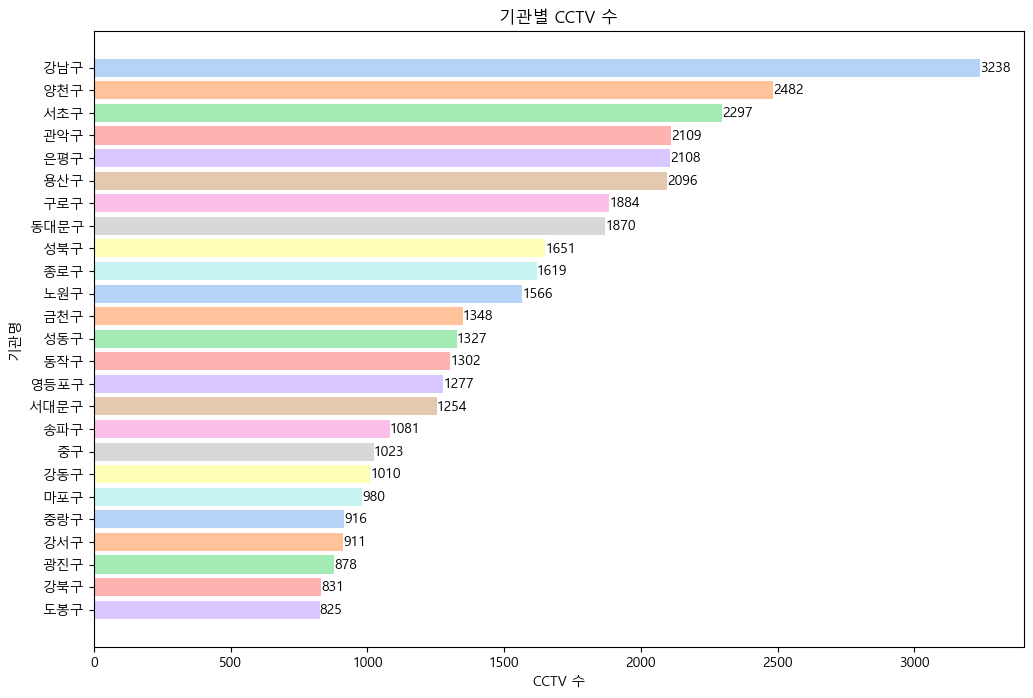

In [12]:
# --- 기관별 CCTV 수 그래프 ---

# 데이터 준비
# x축: CCTV 소계 (막대의 길이)
x = cctv_data['소계']

# y축: 기관명 (각 막대 레이블)
y = cctv_data['기관명']


# 색상 설정 (파스텔톤)
# seaborn의 'pastel' 팔레트를 사용하여 막대별 색상을 지정
palette = sns.color_palette("pastel", len(cctv_data))  # 데이터 개수만큼 색상 생성

# 기관명과 색상을 매핑하여 딕셔너리로 저장
colors = {org: palette[i] for i, org in enumerate(cctv_data['기관명'])}


# 그래프 그리기
plt.figure(figsize=(12,8))  # 그래프 크기 설정 (가로 12, 세로 8)

# 각 기관별로 막대 하나씩 그리기
for i, row in cctv_data.iterrows():
    # row['기관명']: y축 위치 (막대 레이블)
    # row['소계']: x축 값 (막대 길이)
    # color=colors[row['기관명']]: 기관별로 다른 파스텔 색상 적용
    # alpha=0.8: 막대의 투명도를 80%로 설정 (조금 연하게 보이도록)
    plt.barh(row['기관명'], row['소계'], color=colors[row['기관명']], alpha=0.8)


# 막대 위에 CCTV 수치 표시
for i, row in cctv_data.iterrows():
    # row['소계'] + 0.5: 막대 끝보다 약간 오른쪽으로 이동
    # row['기관명']: y축 위치
    # va='center': 텍스트 수직 중앙 정렬
    plt.text(row['소계'] + 0.5, row['기관명'], row['소계'], va='center', fontsize=10)


# 축 레이블과 그래프 제목
plt.xlabel('CCTV 수')     # x축 레이블
plt.ylabel('기관명')         # y축 레이블
plt.title('기관별 CCTV 수')  # 그래프 제목


# y축 순서 반전 (옵션)
# 값이 큰 기관이 위쪽에 오도록 설정
plt.gca().invert_yaxis()


# 그래프 출력
plt.show()

In [13]:
# --- CCTV 가장 많은 구 ---

cctv_data.head(1)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
1,강남구,3238,1292,430,584,932


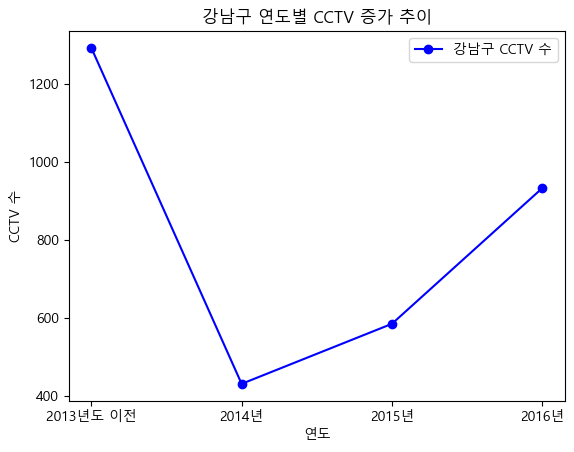

In [14]:
# --- CCTV 가장 많은 강남구의 연도별 증가 그래프 ---

# cctv_data의 첫 번째 행 선택 (강남구 데이터라고 가정)
gangnam = cctv_data.iloc[0]  

# x축: 연도 컬럼
years = ['2013년도 이전', '2014년', '2015년', '2016년']

# y축: 강남구 CCTV 수 (선택한 연도 컬럼 값)
cctv_count = gangnam[years].values  # Series를 NumPy 배열로 변환하여 1차원 형태로 만듦

# --- 선 그래프 그리기 ---
plt.plot(
    years,                # x축 데이터: 연도
    cctv_count,           # y축 데이터: CCTV 수
    marker='o',           # 각 데이터 포인트에 원형 표시
    linestyle='-',        # 데이터를 선으로 연결
    color='blue',      # 선 색상
    label='강남구 CCTV 수' # 범례 텍스트
)

# --- 축 레이블과 그래프 제목 ---
plt.xlabel('연도')        # x축 레이블
plt.ylabel('CCTV 수')     # y축 레이블
plt.title('강남구 연도별 CCTV 증가 추이')  # 그래프 제목

# --- 범례 ---
plt.legend(loc='best')    # 최적 위치에 범례 자동 배치

# --- 그래프 화면 출력 ---
plt.show()

In [15]:
# --- CCTV 가장 적은 구 ---

cctv_data.tail(1)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
25,도봉구,825,238,159,42,386


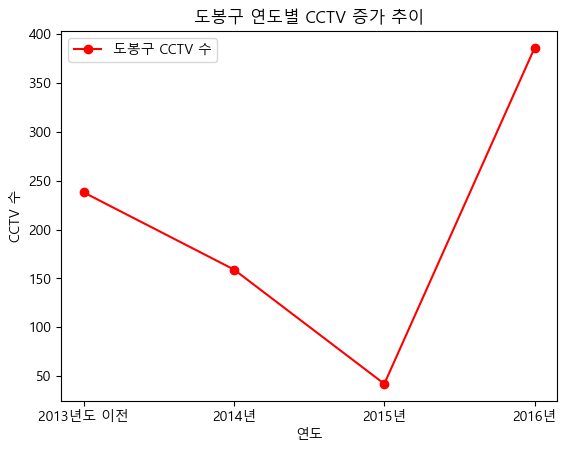

In [16]:
# --- CCTV 가장 적은 도봉구의 연도별 증가 그래프 ---

# cctv_data의 마지막 행 선택 (도봉구 데이터라고 가정)
dobong = cctv_data.iloc[-1]

# x축: 연도 컬럼
years = ['2013년도 이전', '2014년', '2015년', '2016년']

# y축: 도봉구 CCTV 수 (선택한 연도 컬럼 값)
cctv_count = dobong[years].values  # Series를 NumPy 배열로 변환하여 1차원 형태로 만듦

# --- 선 그래프 그리기 ---
plt.plot(
    years,                # x축 데이터: 연도
    cctv_count,           # y축 데이터: CCTV 수
    marker='o',           # 각 데이터 포인트에 원형 표시
    linestyle='-',        # 데이터를 선으로 연결
    color='red',      # 선 색상
    label='도봉구 CCTV 수' # 범례 텍스트
)

# --- 축 레이블과 그래프 제목 ---
plt.xlabel('연도')        # x축 레이블
plt.ylabel('CCTV 수')     # y축 레이블
plt.title('도봉구 연도별 CCTV 증가 추이')  # 그래프 제목

# --- 범례 ---
plt.legend(loc='best')    # 최적 위치에 범례 자동 배치

# --- 그래프 화면 출력 ---
plt.show()

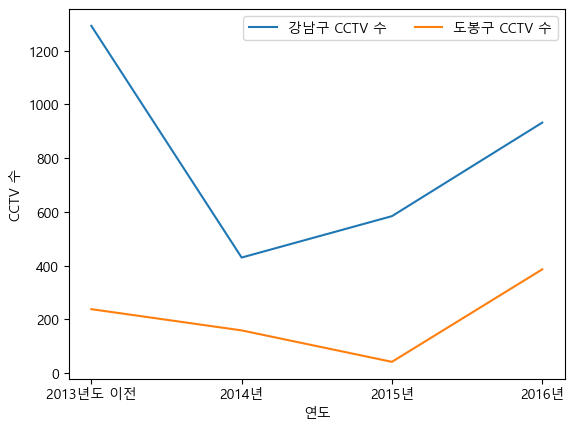

In [27]:
# --- CCTV 가장 많은 강남구와 가장 적은 도봉구의 연도별 증가 그래프 ---


# 그래프에 사용할 연도(컬럼) 리스트를 정의
years = ['2013년도 이전', '2014년', '2015년', '2016년']

# cctv_data 데이터프레임에서 첫 번째 행(강남구) 데이터 가져옴
gangnam = cctv_data.iloc[0]

# cctv_data 데이터프레임에서 마지막 행(도봉구) 데이터를 가져옴
dobong = cctv_data.iloc[-1]


# --- 그래프 그리기 ---

# 강남구 CCTV 수를 선 그래프로 그림
# x축: years / y축: 강남구의 해당 연도 CCTV 수
plt.plot(years, gangnam[years].values, label='강남구 CCTV 수')
# label='강남구 CCTV 수' : 범례에 표시될 이름

# 도봉구 CCTV 수를 선 그래프로 그림
plt.plot(years, dobong[years].values, label='도봉구 CCTV 수')
# label='도봉구 CCTV 수' : 범례에 표시될 이름

# x축 레이블 추가
plt.xlabel('연도')

# y축 레이블 추가
plt.ylabel('CCTV 수')


# --- 범례 설정 ---

# 첫 번째 범례 호출 → loc='best'로 최적 위치 자동 배치
plt.legend(loc='best')
# 이 호출은 곧 아래 호출에 의해 덮어써짐(중복 호출)

# 두 번째 범례 호출 (최종적으로 적용됨)
# loc='best' : 데이터와 겹치지 않는 최적 위치
# ncol=2     : 범례를 2개의 열로 정렬해 가로로 넓게 표시
plt.legend(loc='best', ncol=2)


# 완성된 그래프 화면에 표시
plt.show()

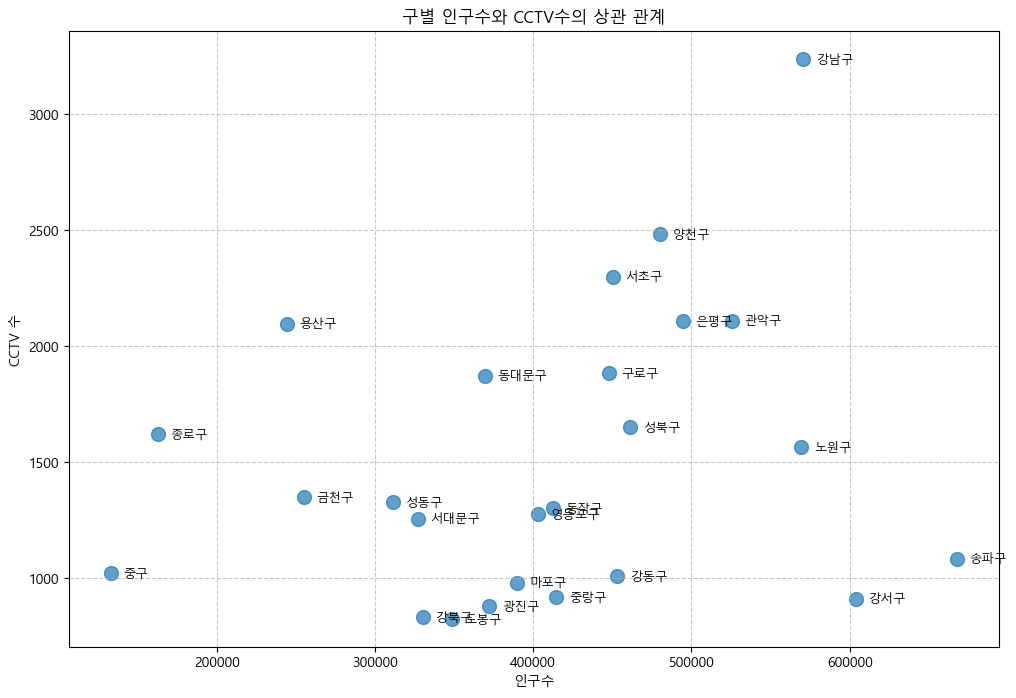

In [ ]:
# ------------------------------------------------------------
#     인구수가 많으면 CCTV수가 많은가?
# ------------------------------------------------------------


# --- 구별 인구수와 CCTV수 비교 그래프 ---

# 필요한 3개 컬럼만 선택하여 새로운 DataFrame 생성
population_cctv_count_data = cctv_result_data[['구별', '인구수', 'CCTV수']]

# 그래프의 크기를 가로 10, 세로 8로 설정
plt.figure(figsize=(12, 8))

# 산점도(scatter plot) 생성
plt.scatter(
    population_cctv_count_data['인구수'],   # X축: 인구수
    population_cctv_count_data['CCTV수'],   # Y축: CCTV 수
    s=100,                                  # 점의 크기
    alpha=0.7                                # 점의 투명도
)


# 각 점에 구 이름(label) 표시하기
# iloc[i] 사용 → 인덱스 번호가 0이나 1이나 100(등등..)부터 시작해도 문제 없음
for i in range(len(population_cctv_count_data)):
    plt.text(
        # 텍스트가 표시될 X좌표 (인구수) + 6000: 점에서 약간 오른쪽으로 이동하여 겹침 방지
        population_cctv_count_data.iloc[i]['인구수'] + 8000,   
        # 텍스트가 표시될 Y좌표 (CCTV 수) -30: 점보다 약간 아래로 이동
        population_cctv_count_data.iloc[i]['CCTV수'] - 30,
        # 표시할 텍스트: 각 구의 이름
        population_cctv_count_data.iloc[i]['구별'],     
        fontsize=9,          # 글자 크기 설정
        ha='left',           # 수평 정렬: 왼쪽 기준
        va='bottom'          # 수직 정렬: 아래쪽 기준
    )



plt.xlabel('인구수')    # X축 레이블
plt.ylabel('CCTV 수')   # Y축 레이블
plt.title('구별 인구수와 CCTV수의 상관 관계')   # 그래프 제목
plt.grid(True, linestyle='--', alpha=0.7)  # 격자 표시 (점선, 투명도 0.7)

plt.show()


# ------------------------------------------------------------
#     아래 그래프를 확인해보면
#     인구수가 많은 강서구와 송파구는 강남구에 비해
#     CCTV 수가 매우 적다는 것을 알 수 있었음
# ------------------------------------------------------------

In [ ]:
# ------------------------------------------------------------
#     그럼 타 구역과 비교했을 때,
#     예상 CCTV수는 어떻게 되어야하나?
# ------------------------------------------------------------

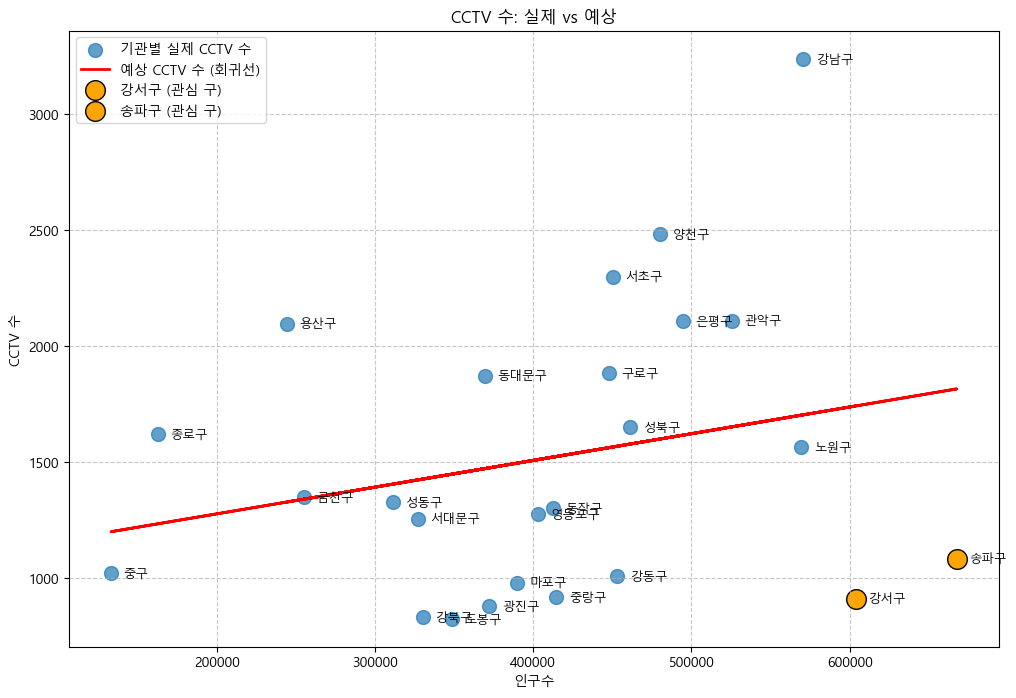

In [ ]:
# --- 강서구와 송파구의 CCTV 수: 실제 vs 예상 ---

# 관심 구 리스트 설정
highlight_gu = ['강서구', '송파구']  
# 그래프에서 특별히 강조하고 싶은 구 이름들을 리스트로 지정

# 전체 데이터
x = cctv_result_data['인구수']   # X축: 각 구의 인구수
y = cctv_result_data['CCTV수']  # Y축: 각 구의 CCTV 수

# 선형 회귀선 계산 (예상 CCTV 수)
m, b = np.polyfit(x, y, 1)      # 1차 회귀선 계산: y = m*x + b
y_pred = m * x + b               # 각 구의 인구수에 대한 예상 CCTV 수

# 그래프 생성
plt.figure(figsize=(12, 8))      # 그래프 크기 설정 (가로 12인치, 세로 8인치)

# 전체 데이터 산점도
plt.scatter(x, y, s=100, alpha=0.7, label='기관별 실제 CCTV 수')
# s=100 : 점 크기, alpha=0.7 : 투명도, label : 범례 이름

# 회귀선
plt.plot(x, y_pred, color='red', linewidth=2, label='예상 CCTV 수 (회귀선)')  
# 인구수 대비 예상 CCTV 수를 빨간 선으로 표시
# linewidth=2 : 선 두께, label : 범례 이름


# 관심 구 강조
for gu in highlight_gu:
    # Boolean indexing으로 관심 구 행 선택
    target_index = cctv_result_data['구별'] == gu  
    
    # 관심 구 점 강조
    plt.scatter(
        cctv_result_data.loc[target_index, '인구수'],   # X좌표: 인구수
        cctv_result_data.loc[target_index, 'CCTV수'],   # Y좌표: CCTV 수
        s=200,                                         # 점 크기
        color='orange',                                # 점 색상
        edgecolor='black',                             # 점 테두리 색
        label=f'{gu} (관심 구)'                                  # 범례 표시
    )


# 구 이름 레이블 표시 (간격 조정으로 겹침 최소화)
for i in range(len(cctv_result_data)):
    plt.text(
        x[i] + 8000,        # X좌표: 점보다 약간 오른쪽으로 이동
        y[i] - 30,          # Y좌표: 점보다 약간 아래로 이동
        cctv_result_data.iloc[i]['구별'],   # 구 이름 가져오기
        fontsize=9,          # 글자 크기
        ha='left',           # 수평 정렬: 왼쪽
        va='bottom'          # 수직 정렬: 아래쪽
    )


plt.xlabel('인구수')  # X축 레이블
plt.ylabel('CCTV 수') # Y축 레이블
plt.title('인구대비 CCTV 수: 실제 vs 예상')  # 그래프 제목
plt.legend()           # 범례 표시
plt.grid(True, linestyle='--', alpha=0.7)  # 격자 표시 (점선, 투명도 0.7)

plt.show()


# ------------------------------------------------------------
#     빨간 선은 인구수 대비 평균적인 CCTV 수 추세를 보여줌
#     실제 CCTV 수(y)와 비교하면,
#     빨간 선 위에 있으면 예상보다 많음
#     빨간 선 아래에 있으면 예상보다 적음
# ------------------------------------------------------------
#     송파구와 강서구는 현재 CCTV 수는 인구 대비 평균보다 적은 상태
#     즉, 빨간 선 위로 올라가야 인구 대비 적정(예상) CCTV 수가 됨
# ------------------------------------------------------------

In [50]:
population_data = pd.read_excel('./data/population_in_Seoul.xls')
population_data

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
5,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
6,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997
7,2017.1/4,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
8,2017.1/4,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
9,2017.1/4,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774
